In [1]:
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
%matplotlib inline

***Question 1***

In [2]:
data = sklearn.datasets.fetch_california_housing(as_frame = True)

In [3]:
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


***Question 2***

In [4]:
y = data.frame['MedHouseVal']

In [5]:
X = data.frame.iloc[:,0:8]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=(2021-3-25))

***Question 3***

In [7]:
reg = LinearRegression().fit(X_train['AveBedrms'][:,None], y_train)

In [8]:
pred_train = reg.predict(X_train['AveBedrms'][:,None])

In [9]:
MSE_train = mean_squared_error(pred_train, y_train)
MSE_train

1.3278477256171917

In [10]:
pred_test = reg.predict(X_test['AveBedrms'][:,None])

In [11]:
MSE_test = mean_squared_error(pred_test, y_test)
MSE_test

1.3323730132311569

***Question 4***

In [12]:
reg.score(X_train['AveBedrms'][:,None], y_train)

0.0028776656256584987

In [13]:
reg.score(X_test['AveBedrms'][:,None], y_test)

-0.0010086368172135263

Answer question about R2...

***Question 5***

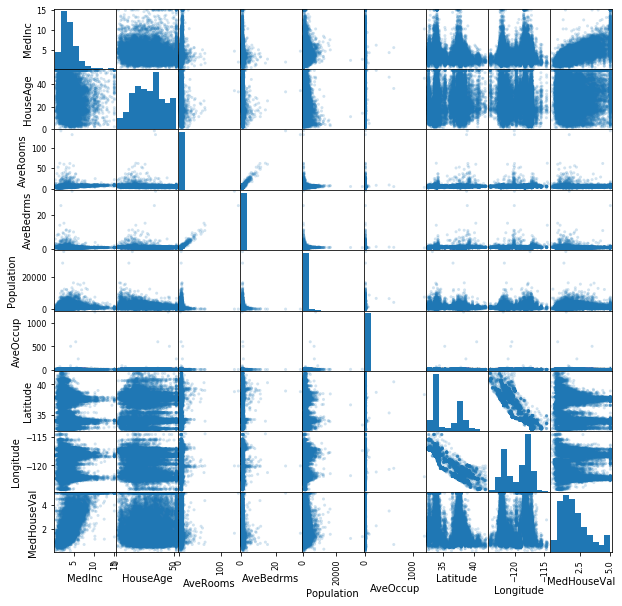

In [22]:
pd.plotting.scatter_matrix(data.frame, alpha=0.2, figsize = (10,10));

***Question 6***

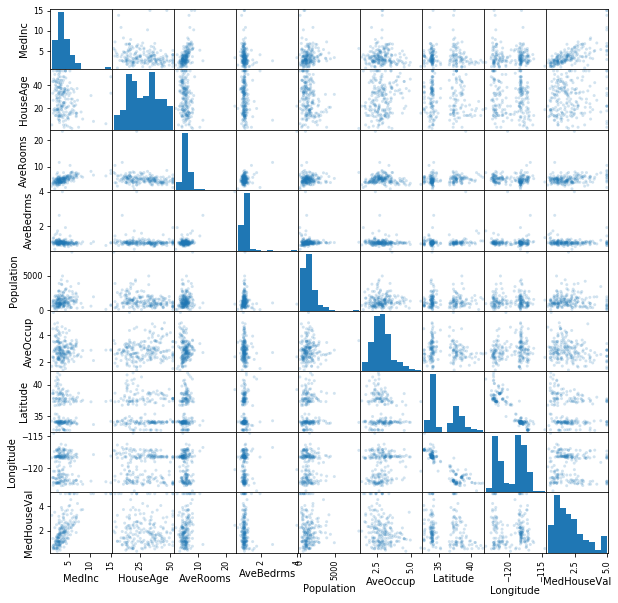

In [21]:
pd.plotting.scatter_matrix(data.frame.sample(frac = 0.01), alpha=0.2, figsize = (10,10));

How does the AveBedrms feature appear to affect MedHouseVal? 

How does this explain the value of R2 you found in experiment (4)?

***Question 7***

AveRooms and AveBedrms? ...because we're taking a sample, the plot will change every time we run it. This can change our hypothesis on which features affects the MedHouseVal the most

***Question 8***